In [1]:
#!/usr/bin/env python3
# Post process a single file
from pathlib import Path
import h5py
from postprocessor.core.processor import PostProcessorParameters, PostProcessor
from agora.io.signal import Signal

from pathos.multiprocessing import Pool

In [7]:
folder = Path("/home/alan/Documents/dev/skeletons/2022_02_01_bak/data/sofia")

In [3]:
def process_file(filepath):
    try:
        # for filepath in Path(folder).rglob("*.h5"):
        with h5py.File(filepath, "a") as f:
            if "postprocessing" in f:
                del f["/postprocessing"]
            if "modifiers" in f:
                del f["/modifiers"]

            params = PostProcessorParameters.default().to_dict()
            pp = PostProcessor(filepath, params)
            pp.run()
            #s = Signal(filepath)
            # s.datasets
        # df = s["/extraction/general/None/area"]

    except Exception as e:
        print(filepath, " failed")
        print(e)


with Pool(10) as p:
    results = p.map(lambda x: process_file(x), Path(folder).rglob("*.h5"))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  3.52it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:08<00:00,  1.39s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:33<00:00,  5.62s/it]


/home/alan/Documents/dev/skeletons/2022_02_01_bak/data/sofia/2021_09_15_1_Raf_06/2021_09_15_1_Raf_06/d1134_016.h5  failed
'Unable to open object (component not found)'


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:13<00:00,  2.32s/it]


In [8]:
from postprocessor.grouper import NameGrouper
g=NameGrouper("/home/alan/Documents/dev/skeletons/2022_02_01_bak/data/sofia/2021_09_15_1_Raf_06/2021_09_15_1_Raf_06")


In [9]:
g.siglist

extraction/GFP/np_max/imBackground
extraction/GFP/np_max/max2p5pc
extraction/GFP/np_max/max2p5pc_med
extraction/GFP/np_max/max5px
extraction/GFP/np_max/max5px_med
extraction/GFP/np_max/mean
extraction/GFP/np_max/median
extraction/GFP_bgsub/np_max/imBackground
extraction/GFP_bgsub/np_max/max2p5pc
extraction/GFP_bgsub/np_max/max2p5pc_med
extraction/GFP_bgsub/np_max/max5px
extraction/GFP_bgsub/np_max/max5px_med
extraction/GFP_bgsub/np_max/mean
extraction/GFP_bgsub/np_max/median
extraction/general/None/area
extraction/general/None/eccentricity
extraction/general/None/volume
postprocessing/births/extraction_general_None_volume
postprocessing/bud_metric/extraction_general_None_volume
postprocessing/bud_metric/postprocessing_dsignal_extraction_general_None_volume
postprocessing/bud_metric/postprocessing_dsignal_postprocessing_savgol_extraction_general_None_volume
postprocessing/bud_metric/postprocessing_savgol_extraction_general_None_volume
postprocessing/dsignal/extraction_general_None_volum

In [15]:
to_delete= []
for k,s in g.signals.items():
    try:
        s['postprocessing/bud_metric/postprocessing_dsignal_postprocessing_savgol_extraction_general_None_volume']
    except:
        to_delete.append(k)
print(to_delete)
for k in to_delete:
    del g.signals[k]

['d1134_016']


Looking at Looking at Looking at   Looking at  Looking at pic2_001pic2_006Looking at d1137_013 
 Looking at 

pic2_007Looking at  d1134_018
 d1137_014 

d1134_017pic2_004

Looking at  pic2_002
Looking at  pic2_003
Looking at  d1137_024
Looking at  d1134_021
Looking at  d1134_020
Looking at  d1134_022
Looking at  pic2_008
Looking at  d1134_019
Looking at  d1137_012
Looking at  d1137_011
Looking at  pic2_005
Looking at  d1137_015
Looking at  d1137_009
Looking at  d1137_010
Looking at  d1134_023


<AxesSubplot:ylabel='group-position-trap-cell_label'>

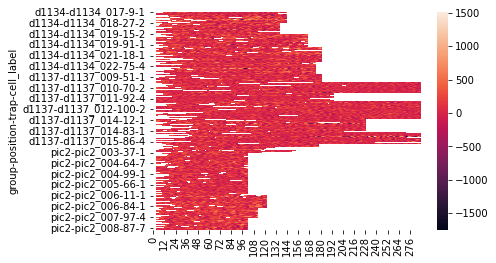

In [16]:

import seaborn as sns
sns.heatmap(g.concat_signal("postprocessing/bud_metric/postprocessing_dsignal_postprocessing_savgol_extraction_general_None_volume"))

In [23]:
df = g.concat_signal("postprocessing/bud_metric/postprocessing_dsignal_postprocessing_savgol_extraction_general_None_volume",mode="raw")
df.shape

Looking at Looking at Looking at  Looking at   pic2_006pic2_001d1137_013
Looking at Looking at 

 Looking at   d1134_018Looking at d1137_014  pic2_004

d1134_017pic2_007

Looking at 
 Looking at Looking at  d1137_024Looking at 
  pic2_003d1134_021

pic2_002Looking at Looking at Looking at  pic2_008
 Looking at d1134_022 
d1134_019Looking at 
Looking at  d1134_020Looking at d1137_011  
pic2_005 d1137_012
Looking at Looking at   d1137_015
d1137_009

Looking at  d1137_010


Looking at  d1134_023


(6694, 288)

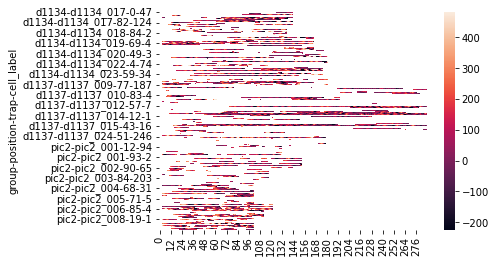

In [18]:
sns.heatmap(df, robust=True)
import matplotlib.pyplot as plt
plt.savefig('bud_gr.png', dpi=300)

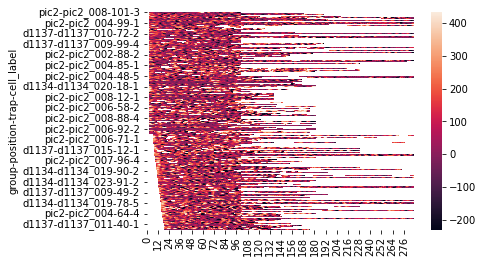

In [26]:
filt=df.loc[df.iloc[:,:100].notna().sum(axis=1)>80]
sns.heatmap(filt.loc[filt.apply(lambda x: x.first_valid_index(), axis=1).sort_values().index], robust=True)
plt.savefig('tmp.png', dpi=200)

Looking at Looking at Looking at  Looking at   pic2_006Looking at pic2_001d1137_013  

pic2_007Looking at 
d1134_018

 Looking at d1137_014 pic2_004
Looking at  
 Looking at Looking at d1134_017 
pic2_003pic2_002
Looking at Looking at  Looking at d1134_021  
d1134_020d1137_024Looking at 

 
 Looking at Looking at pic2_008
Looking at d1134_022
Looking at Looking at   d1134_019 
d1137_012d1137_011
Looking at  d1137_015 Looking at  
d1137_009
pic2_005

Looking at Looking at  d1134_023
 d1137_010


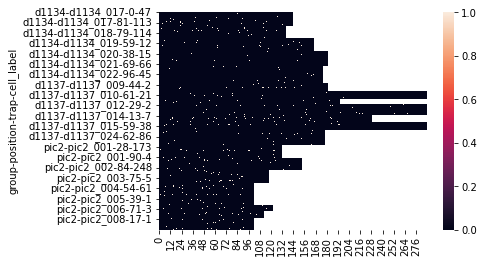

In [20]:
births = g.concat_signal("postprocessing/births/extraction_general_None_volume", mode='raw')
sns.heatmap(births)
import matplotlib.pyplot as plt
plt.savefig('births.png', dpi=200)

<AxesSubplot:xlabel='group', ylabel='0'>

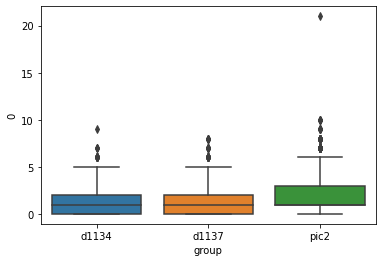

In [38]:
sns.boxplot(data=births.loc[births.sum(axis=1)>0].iloc[:,:90].sum(axis=1).reset_index(), x='group', y=0)

In [21]:
vols = g.concat_signal('postprocessing/bud_metric/postprocessing_savgol_extraction_general_None_volume', mode='raw')
vols = vols.loc[vols.notna().sum(axis=1)>0.5*vols.shape[1]]

Looking at Looking at Looking at    Looking at pic2_001pic2_006d1137_013Looking at 

 
Looking at pic2_007 d1134_018 Looking at 
 d1137_014

Looking at d1134_017
 pic2_004
Looking at Looking at  Looking at  pic2_002d1137_024
Looking at 
 d1134_021Looking at 
Looking at  Looking at 
 pic2_003pic2_008Looking at 
 
  d1134_022d1134_020
Looking at Looking at Looking at  pic2_005 Looking at 
 d1137_011d1134_019Looking at Looking at d1137_015


  d1137_009Looking at 
 d1137_012d1134_023

 d1137_010


In [30]:
print(vols.shape, births.shape)

(155, 180) (4848, 180)


<AxesSubplot:xlabel='group', ylabel='0'>

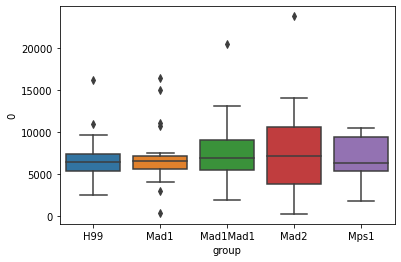

In [47]:
tmp_vols = vols
sns.boxplot(data=tmp_vols.where(births.loc[vols.index].astype(bool)).median(axis=1).reset_index(),x='group', y=0)

<AxesSubplot:xlabel='group', ylabel='0'>

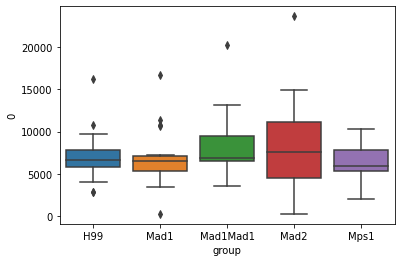

In [48]:
sns.boxplot(data=vols.where(births.loc[vols.index].astype(bool).shift(1, axis=1)).median(axis=1).reset_index(),x='group', y=0)

In [ ]:
#We check the volume of the previous daughter before a birth
postprocessing/bud_metric/extraction_general_None_volume

We index the mothers using the same order as bud_metric

In [ ]:
df=g.concat_signal('extraction/general/None/volume')
#sns.heatmap(g)

In [ ]:
sns.heatmap(df.loc[df.index.intersection(filt.index)])

In [34]:
filt.shape

(431, 288)

<AxesSubplot:xlabel='group', ylabel='0'>

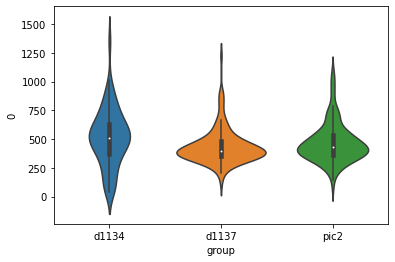

In [35]:
sns.violinplot(data=filt.max(axis=1).reset_index(), x='group', y=0)

In [55]:
gfp = g.concat_signal('extraction/GFP/np_max/median')
common_index = gfp.index.intersection(filt.index)
gfp = gfp.loc[common_index]

Looking at Looking at Looking at   Looking at  pic2_001pic2_006Looking at d1137_013
 

pic2_007Looking at   Looking at pic2_004Looking at  
d1134_017
 d1134_018
d1137_014

Looking at  pic2_002
Looking at  pic2_003
Looking at  d1137_024
Looking at  d1134_021
Looking at  d1134_020
Looking at  d1134_022
Looking at  pic2_008
Looking at  d1134_019
Looking at  d1137_012
Looking at  d1137_011
Looking at  pic2_005
Looking at  d1137_015
Looking at  d1137_009
Looking at  d1137_010
Looking at  d1134_023


In [57]:
import pandas as pd
combined = pd.concat((gfp.median(axis=1), filt.max(axis=1), births.loc[common_index].iloc[:,:90].sum(axis=1)), axis=1)
combined.columns = ['GFP', 'maxBudGR', 'nbirths']

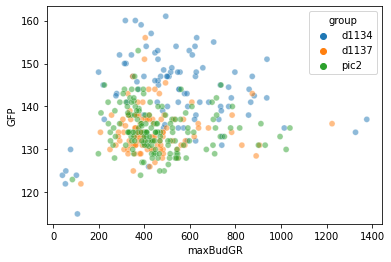

In [60]:
sns.scatterplot(data=combined.reset_index(), x='maxBudGR', y='GFP', hue='group', alpha=0.5)
plt.savefig('budgr_vs_gfp.png', dpi=300)

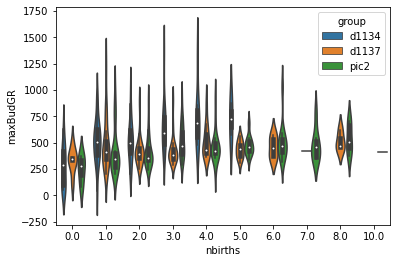

In [63]:
sns.violinplot(data=combined.reset_index(), x='nbirths', y='maxBudGR', hue='group', alpha=0.3)
plt.savefig('births_vs_gr.png', dpi=300)

In [ ]:
sns.boxplot(data=filt.iloc[:,70:150].max(axis=1).reset_index(), x='group', y=0)

In [ ]:
ratio = (filt.iloc[:,:70].max(axis=1) / filt.iloc[:,70:150].max(axis=1)).reset_index()
sns.boxplot(data=ratio[ratio[0]>0],x='group',y=0)

In [ ]:
meanbgr = df.loc[df.notna().sum(axis=1)>df.shape[1]*0.5].max(axis=1).reset_index()
sns.boxplot(data=meanbgr[meanbgr[0]>0], x='group', y=0)

In [ ]:
meanbgr = df.mean(axis=1).reset_index()
sns.boxplot(data=meanbgr[meanbgr[0]>0], x='group', y=0)

In [ ]:
postprocessing/dsignal/postprocessing_bud_metric_extraction_general_None_volume